# 4. Case Study - Sunlight in Austin

Bekerja dengan data cuaca dan iklim dunia nyata, bab ini akan memungkinkan Anda untuk menerapkan semua keterampilan yang telah Anda peroleh dalam kursus ini. Anda akan menggunakan pandas untuk memanipulasi data menjadi bentuk yang dapat digunakan untuk analisis dan mengeksplorasi secara sistematis menggunakan teknik yang telah Anda pelajari.

## Reading and cleaning the data

### Reading in a data file

Sekarang Anda telah mengidentifikasi metode yang digunakan untuk membaca data, mari kita coba membaca satu file. Masalah dengan data nyata seperti ini adalah bahwa file hampir tidak pernah diformat dengan cara yang mudah. Dalam latihan ini, ada beberapa masalah yang harus diatasi dalam membaca file. Pertama, tidak ada header, dan dengan demikian kolom tidak memiliki label. Juga tidak ada kolom indeks yang jelas, karena tidak ada kolom data yang berisi tanggal atau waktu lengkap.

Tugas Anda adalah membaca file menjadi DataFrame menggunakan argumen default. Setelah memeriksanya, Anda akan membaca kembali file yang menyatakan tidak ada header yang disediakan.

File CSV telah disediakan untuk Anda sebagai variabel `data_file`.

In [20]:
# Import pandas
import pandas as pd

# Reading data .txt with pandas
# df = pd.read_csv('NOAA_QCLCD_2011_hourly_13904.txt', sep=',')
# df.to_csv('NOAA_QCLCD_2011_hourly_13904.csv', index=False)
data_file = 'NOAA_QCLCD_2011_hourly_13904.csv'

In [21]:
# Read in the data file: df
df = pd.read_csv(data_file)

# Print the output of df.head()
print(df.head())

# Read in the data file with header=None: df_headers
df_headers = pd.read_csv(data_file, header=None)

# Print the output of df_headers.head()
print(df_headers.head())

   13904  20110101  0053  12  OVC045     10.00  .1  .2  .3  ...  .18  .19  \
0  13904  20110101   153  12  OVC049     10.00              ...             
1  13904  20110101   253  12  OVC060     10.00              ...  030        
2  13904  20110101   353  12  OVC065     10.00              ...             
3  13904  20110101   453  12  BKN070     10.00              ...             
4  13904  20110101   553  12  BKN065     10.00              ...  015        

   29.95  .20  AA  .21  .22  .23 29.95.1  .24  
0  30.01       AA                  30.02       
1  30.01       AA                  30.02       
2  30.03       AA                  30.04       
3  30.04       AA                  30.04       
4  30.06       AA                  30.06       

[5 rows x 44 columns]
      0         1    2   3       4  5      6    7    8    9   ...    34    35  \
0  13904  20110101   53  12  OVC045     10.00   .1   .2   .3  ...   .18   .19   
1  13904  20110101  153  12  OVC049     10.00                 ..

**Note** : Perhatikan bagaimana nama kolom tidak informatif. Anda akan memperbaikinya di latihan selanjutnya!

### Re-assigning column names

Setelah langkah awal membaca data, langkah selanjutnya adalah membersihkan dan merapikannya sehingga lebih mudah untuk dikerjakan.

Dalam latihan ini, Anda akan memulai proses pembersihan ini dengan menetapkan ulang nama kolom dan menghilangkan kolom yang tidak perlu.

Pandas telah diimpor di ruang kerja sebagai `pd`, dan file `NOAA_QCLCD_2011_hourly_13904.txt` telah diuraikan dan dimuat ke dalam DataFrame `df`. String yang dipisahkan koma dari nama kolom, `column_labels`, dan list kolom untuk dihilangkan, `list_to_drop`, juga telah dimuat untuk Anda.

In [22]:
# Kolom label dan list kolom yang ingin dihilangkan
column_labels = 'Wban,date,Time,StationType,sky_condition,sky_conditionFlag,visibility,visibilityFlag,wx_and_obst_to_vision,wx_and_obst_to_visionFlag,dry_bulb_faren,dry_bulb_farenFlag,dry_bulb_cel,dry_bulb_celFlag,wet_bulb_faren,wet_bulb_farenFlag,wet_bulb_cel,wet_bulb_celFlag,dew_point_faren,dew_point_farenFlag,dew_point_cel,dew_point_celFlag,relative_humidity,relative_humidityFlag,wind_speed,wind_speedFlag,wind_direction,wind_directionFlag,value_for_wind_character,value_for_wind_characterFlag,station_pressure,station_pressureFlag,pressure_tendency,pressure_tendencyFlag,presschange,presschangeFlag,sea_level_pressure,sea_level_pressureFlag,record_type,hourly_precip,hourly_precipFlag,altimeter,altimeterFlag,junk'
list_to_drop = ['sky_conditionFlag', 'visibilityFlag', 'wx_and_obst_to_vision', 'wx_and_obst_to_visionFlag', 'dry_bulb_farenFlag', 'dry_bulb_celFlag', 'wet_bulb_farenFlag', 'wet_bulb_celFlag', 'dew_point_farenFlag', 'dew_point_celFlag', 'relative_humidityFlag', 'wind_speedFlag', 'wind_directionFlag', 'value_for_wind_character', 'value_for_wind_characterFlag', 'station_pressureFlag', 'pressure_tendencyFlag', 'pressure_tendency', 'presschange', 'presschangeFlag', 'sea_level_pressureFlag', 'hourly_precip', 'hourly_precipFlag', 'altimeter', 'record_type', 'altimeterFlag', 'junk']


In [24]:
# Split on the comma to create a list: column_labels_list
column_labels_list = column_labels.split(',')

# Assign the new column labels to the DataFrame: df.columns
df.columns = column_labels_list

# Remove the appropriate columns: df_dropped
df_dropped = df.drop(list_to_drop, axis='columns')

# Print the output of df_dropped.head()
df_dropped.head()

,Wban,date,Time,StationType,sky_condition,visibility,dry_bulb_faren,dry_bulb_cel,wet_bulb_faren,wet_bulb_cel,dew_point_faren,dew_point_cel,relative_humidity,wind_speed,wind_direction,station_pressure,sea_level_pressure
0,13904,20110101,153,12,OVC049,10.00,51,10.6,37,3.0,14,-10.0,23,10,340,29.49,30.01
1,13904,20110101,253,12,OVC060,10.00,51,10.6,37,2.9,13,-10.6,22,15,010,29.49,30.01
2,13904,20110101,353,12,OVC065,10.00,50,10.0,38,3.1,17,-8.3,27,7,350,29.51,30.03
3,13904,20110101,453,12,BKN070,10.00,50,10.0,37,2.8,15,-9.4,25,11,020,29.51,30.04
4,13904,20110101,553,12,BKN065,10.00,49,9.4,37,2.8,17,-8.3,28,6,010,29.53,30.06


**Note** : Sekarang Anda memiliki nama kolom informatif, jauh lebih mudah untuk menginterpretasikan data! Tetapi masih ada beberapa pekerjaan yang harus dilakukan: Anda akan membersihkan data waktu dalam latihan berikutnya.

### Cleaning and tidying datetime data

Untuk menggunakan kekuatan penuh dari deret waktu pandas, Anda harus membuat `DatetimeIndex`. Untuk melakukannya, perlu untuk membersihkan dan mengubah kolom tanggal dan waktu.

DataFrame `df_dropped` yang Anda buat pada latihan terakhir disediakan untuk Anda dan pandas telah diimpor sebagai `pd`.

Tugas Anda adalah untuk membersihkan kolom `date` dan `Time` dan menggabungkannya ke dalam kumpulan data waktu untuk digunakan sebagai Indeks.

In [27]:
# Convert the date column to string: df_dropped['date']
df_dropped['date'] = df_dropped['date'].astype(str)

# Pad leading zeros to the Time column: df_dropped['Time']
df_dropped['Time'] = df_dropped['Time'].apply(lambda x:'{:0>4}'.format(x))

# Concatenate the new date and Time columns: date_string
date_string = df_dropped['date'] + df_dropped['Time']

# Convert the date_string Series to datetime: date_times
date_times = pd.to_datetime(date_string, format='%Y%m%d%H%M')

# Set the index to be the new date_times container: df_clean
df_clean = df_dropped.set_index(date_times)

# Print the output of df_clean.head()
df_clean.head()

,Wban,date,Time,StationType,sky_condition,visibility,dry_bulb_faren,dry_bulb_cel,wet_bulb_faren,wet_bulb_cel,dew_point_faren,dew_point_cel,relative_humidity,wind_speed,wind_direction,station_pressure,sea_level_pressure
2011-01-01 01:53:00,13904,20110101,0153,12,OVC049,10.00,51,10.6,37,3.0,14,-10.0,23,10,340,29.49,30.01
2011-01-01 02:53:00,13904,20110101,0253,12,OVC060,10.00,51,10.6,37,2.9,13,-10.6,22,15,010,29.49,30.01
2011-01-01 03:53:00,13904,20110101,0353,12,OVC065,10.00,50,10.0,38,3.1,17,-8.3,27,7,350,29.51,30.03
2011-01-01 04:53:00,13904,20110101,0453,12,BKN070,10.00,50,10.0,37,2.8,15,-9.4,25,11,020,29.51,30.04
2011-01-01 05:53:00,13904,20110101,0553,12,BKN065,10.00,49,9.4,37,2.8,17,-8.3,28,6,010,29.53,30.06


**Note** : Yang tersisa sekarang adalah membersihkan kolom angka.

### Cleaning the numeric columns

Kolom numerik yang berisi nilai yang hilang berlabel `'M'`. Dalam latihan ini, tugas Anda adalah mengubah kolom ini sedemikian rupa sehingga hanya berisi nilai numerik dan menafsirkan data yang hilang sebagai `NaN`.

Fungsi pandas `pd.to_numeric()` sangat ideal untuk tujuan ini: Ini mengubah serangkaian nilai menjadi nilai floating-point. Selain itu, dengan menentukan keyword argument `errors='coerce'`, Anda dapat memaksa string seperti `'M'` untuk ditafsirkan sebagai `NaN`.

In [28]:
# Print the dry_bulb_faren temperature between 8 AM and 9 AM on June 20, 2011
print(df_clean.loc['2011-06-20 08:00:00':'2011-06-20 09:00:00', 'dry_bulb_faren'])

# Convert the dry_bulb_faren column to numeric values: df_clean['dry_bulb_faren']
df_clean['dry_bulb_faren'] = pd.to_numeric(df_clean['dry_bulb_faren'], errors='coerce')

# Print the transformed dry_bulb_faren temperature between 8 AM and 9 AM on June 20, 2011
print(df_clean.loc['2011-06-20 08:00:00':'2011-06-20 09:00:00', 'dry_bulb_faren'])

# Convert the wind_speed and dew_point_faren columns to numeric values
df_clean['wind_speed'] = pd.to_numeric(df_clean['wind_speed'], errors='coerce')
df_clean['dew_point_faren'] = pd.to_numeric(df_clean['dew_point_faren'], errors='coerce')

2011-06-20 08:27:00     M
2011-06-20 08:28:00     M
2011-06-20 08:29:00     M
2011-06-20 08:30:00     M
2011-06-20 08:31:00     M
2011-06-20 08:32:00     M
2011-06-20 08:33:00     M
2011-06-20 08:34:00     M
2011-06-20 08:35:00     M
2011-06-20 08:53:00    83
Name: dry_bulb_faren, dtype: object
2011-06-20 08:27:00     NaN
2011-06-20 08:28:00     NaN
2011-06-20 08:29:00     NaN
2011-06-20 08:30:00     NaN
2011-06-20 08:31:00     NaN
2011-06-20 08:32:00     NaN
2011-06-20 08:33:00     NaN
2011-06-20 08:34:00     NaN
2011-06-20 08:35:00     NaN
2011-06-20 08:53:00    83.0
Name: dry_bulb_faren, dtype: float64


**Note** : Setelah data Anda bersih, Anda dapat mulai dengan analisis eksplorasi Anda.

## Statistical exploratory data analysis

### Signal min, max, median

Setelah data dibaca dan dibersihkan, Anda dapat mulai dengan statistik EDA. Pertama, Anda akan menganalisis data cuaca Austin 2011.

Tugas Anda dalam latihan ini adalah menganalisis kolom `'dry_bulb_faren'` dan mencetak suhu rata-rata untuk rentang waktu tertentu. Anda dapat melakukan ini menggunakan pemilihan string datetime parsial.

In [33]:
# Print the median of the dry_bulb_faren column
print(df_clean.dry_bulb_faren.median())

# Print the median of the dry_bulb_faren column for the time range '2011-Apr':'2011-Jun'
print(df_clean.loc['2011-Apr':'2011-Jun', 'dry_bulb_faren'].median())

# Print the median of the dry_bulb_faren column for the month of January
print(df_clean.loc['2011-Jan', 'dry_bulb_faren'].median())

72.0
78.0
48.0


### Signal variance

Anda sekarang siap untuk membandingkan data cuaca 2011 dengan normals 30-tahun yang dilaporkan pada 2010. Anda dapat mengajukan pertanyaan seperti, rata-rata, berapa panas setiap hari di 2011 dari yang diharapkan dari rata-rata 30 tahun?

DataFrames `df_clean` dan `df_climate` dari latihan sebelumnya tersedia.

Tugas Anda pertama-tama adalah melakukan resample `df_clean` dan `df_climate` di siang hari dan mengagregasikan suhu rata-rata. Anda kemudian akan mengekstrak kolom terkait suhu dari masing-masing - `'dry_bulb_faren'` di `df_clean`, dan `'Temperature'` di `df_climate` - sebagai array NumPy dan hitung perbedaannya.

Perhatikan bahwa indeks `df_clean` dan `df_climate` tidak selaras - `df_clean` memiliki tanggal pada 2011, sementara `df_climate` memiliki tanggal pada 2010. Ini sebabnya Anda mengekstrak kolom suhu sebagai array NumPy. Pendekatan alternatif adalah dengan menggunakan metode pandas `.reset_index()` untuk memastikan Series menyelaraskan dengan benar. Anda akan mempraktikkan pendekatan ini juga.

In [36]:
df_climate = pd.read_csv('https://assets.datacamp.com/production/repositories/497/datasets/4d7b2bc6b10b527dc297707fb92fa46b10ac1be5/weather_data_austin_2010.csv', parse_dates=True, index_col='Date')


In [37]:
# Downsample df_clean by day and aggregate by mean: daily_mean_2011
daily_mean_2011 = df_clean.resample('D').mean()

# Extract the dry_bulb_faren column from daily_mean_2011 using .values: daily_temp_2011
daily_temp_2011 = daily_mean_2011['dry_bulb_faren'].values

# Downsample df_climate by day and aggregate by mean: daily_climate
daily_climate = df_climate.resample('D').mean()

# Extract the Temperature column from daily_climate using .reset_index(): daily_temp_climate
daily_temp_climate = daily_climate.reset_index()['Temperature']

# Compute the difference between the two arrays and print the mean difference
difference = daily_temp_2011 - daily_temp_climate
print(difference.mean())

1.3300839215698725


### Sunny or cloudy

Rata-rata, seberapa panas saat matahari bersinar? Dalam latihan ini, Anda akan membandingkan suhu pada hari-hari cerah dengan suhu pada hari-hari mendung.

Tugas Anda adalah menggunakan pilihan Boolean untuk menyaring hari yang cerah dan mendung, dan kemudian menghitung perbedaan suhu maksimum harian rata-rata antara setiap jenis hari.

DataFrame `df_clean` dari latihan sebelumnya telah disediakan untuk Anda. Kolom `'sky_condition'` memberikan informasi tentang apakah hari itu cerah (`'CLR'`) atau mendung (`'OVC'`).

In [39]:
# Using df_clean, when is sky_condition 'CLR'?
is_sky_clear = df_clean['sky_condition'] == 'CLR'

# Filter df_clean using is_sky_clear
sunny = df_clean[is_sky_clear]

# Resample sunny by day then calculate the max
sunny_daily_max = sunny.resample('D').max()

# See the result
sunny_daily_max.head()

,Wban,date,Time,StationType,sky_condition,dry_bulb_faren,dry_bulb_cel,wet_bulb_faren,wet_bulb_cel,dew_point_faren,dew_point_cel,relative_humidity,wind_speed,wind_direction,station_pressure,sea_level_pressure
2011-01-01,13904.0,20110101,2353,12.0,CLR,59.0,8.3,45,7.2,28.0,-6.1,53,16.0,360,29.78,30.33
2011-01-02,13904.0,20110102,2253,12.0,CLR,35.0,1.7,32,0.1,28.0,-7.2,76,8.0,360,29.82,30.38
2011-01-03,13904.0,20110103,0453,12.0,CLR,32.0,0.0,29,-1.9,26.0,-4.4,85,0.0,000,29.71,30.27
2011-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-05,13904.0,20110105,2353,12.0,CLR,35.0,1.7,33,0.3,29.0,-1.7,79,0.0,000,29.54,30.08


In [40]:
# Using df_clean, when does sky_condition contain 'OVC'?
is_sky_overcast = df_clean['sky_condition'].str.contains('OVC')

# Filter df_clean using is_sky_overcast
overcast = df_clean.loc[is_sky_overcast]

# Resample overcast by day then calculate the max
overcast_daily_max = overcast.resample('D').max()

# See the result
overcast_daily_max.head()

,Wban,date,Time,StationType,sky_condition,dry_bulb_faren,dry_bulb_cel,wet_bulb_faren,wet_bulb_cel,dew_point_faren,dew_point_cel,relative_humidity,wind_speed,wind_direction,station_pressure,sea_level_pressure
2011-01-01,13904.0,20110101,0353,12.0,OVC065,51.0,10.6,38,3.1,17.0,-8.3,27,15.0,350,29.51,30.03
2011-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-03,13904.0,20110103,2353,12.0,SCT042 OVC055,58.0,9.4,49,9.7,45.0,7.0,79,10.0,200,29.70,M
2011-01-04,13904.0,20110104,2353,12.0,SCT010 OVC016,57.0,8.9,56,9.4,56.0,8.9,100,8.0,VR,29.59,M
2011-01-05,13904.0,20110105,0653,12.0,SCT006 OVC011,57.0,14.0,56,13.5,56.0,13.3,96,3.0,250,29.48,M


In [41]:
# Calculate the mean of sunny_daily_max
sunny_daily_max_mean = sunny_daily_max.mean()

# Calculate the mean of overcast_daily_max
overcast_daily_max_mean = overcast_daily_max.mean()

# Print the difference (sunny minus overcast)
print(sunny_daily_max_mean - overcast_daily_max_mean)

Wban               0.000000
StationType        0.000000
dry_bulb_faren     6.504304
dew_point_faren   -4.339286
wind_speed        -3.246062
dtype: float64


**Note** : Komputasi suhu yang hebat! Suhu rata-rata bola lampu kering maksimum harian adalah 6,5 derajat Fahrenheit lebih tinggi pada hari-hari cerah dibandingkan hari-hari mendung.

## Visual exploratory data analysis

### Weekly average temperature and visibility

Apakah ada korelasi antara suhu dan visibilitas? Ayo cari tahu.

Dalam latihan ini, tugas Anda adalah memplot suhu rata-rata mingguan dan visibilitas sebagai subplot. Untuk melakukan ini, Anda harus terlebih dahulu memilih kolom yang sesuai dan kemudian sampel ulang berdasarkan minggu, mengagregasikan rata-rata.

Selain membuat subplot, Anda akan menghitung koefisien korelasi Pearson menggunakan `.corr()`. Koefisien korelasi Pearson, juga dikenal sebagai Pearson's r, berkisar dari -1 (menunjukkan total korelasi linear negatif) hingga 1 (menunjukkan total korelasi linear positif). Nilai mendekati 1 di sini akan menunjukkan bahwa ada korelasi kuat antara suhu dan visibilitas.

In [57]:
# Convert columns visibility to numeric
df_clean['visibility'] = pd.to_numeric(df_clean['visibility'], errors='coerce')

                visibility  dry_bulb_faren
visibility         1.00000         0.49004
dry_bulb_faren     0.49004         1.00000


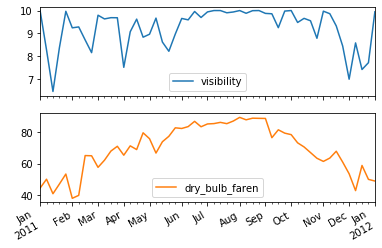

In [59]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Select the visibility and dry_bulb_faren columns and resample them: weekly_mean
weekly_mean = df_clean[['visibility', 'dry_bulb_faren']].resample('W').mean()

# Print the output of weekly_mean.corr()
print(weekly_mean.corr())

# Plot weekly_mean with subplots=True
weekly_mean.plot(subplots=True)
plt.show()

### Daily hours of clear sky

Dalam latihan sebelumnya, Anda menganalisis kolom `'sky_condition'` untuk menjelajahi perbedaan suhu pada hari-hari cerah dibandingkan dengan hari-hari mendung. Ingatlah bahwa `'sky_condition'` dari `'CLR'` mewakili hari yang cerah. Dalam latihan ini, Anda akan menjelajahi hari-hari yang cerah dengan lebih detail. Secara khusus, Anda akan menggunakan box plot untuk memvisualisasikan sebagian kecil dari hari-hari yang cerah.

Kolom `'sky_condition'` direkam setiap jam. Tugas Anda adalah membuat ulang kolom ini dengan tepat sehingga Anda dapat mengekstrak jumlah jam cerah dalam sehari dan jumlah total jam. Kemudian, Anda dapat membagi jumlah jam cerah dengan jumlah total jam, dan menghasilkan box plot dari fraksi yang dihasilkan.

In [60]:
# Using df_clean, when is sky_condition 'CLR'?
is_sky_clear = df_clean['sky_condition'] == 'CLR'

# Resample is_sky_clear by day
resampled = is_sky_clear.resample('D')

# See the result
resampled

In [61]:
# From previous step
is_sky_clear = df_clean['sky_condition'] == 'CLR'
resampled = is_sky_clear.resample('D')

# Calculate the number of sunny hours per day
sunny_hours = resampled.sum()

# Calculate the number of measured hours per day
total_hours = resampled.count()

# Calculate the fraction of hours per day that were sunny
sunny_fraction = sunny_hours / total_hours

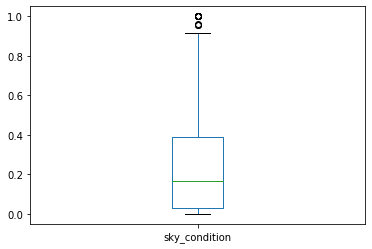

In [62]:
# Make a box plot of sunny_fraction
sunny_fraction.plot(kind='box')
plt.show()

**Note** : Prospek untuk keterampilan Pandas Anda cerah! Sebaliknya, cuaca di dataset biasanya cerah kurang dari 40% dari waktu.

### Heat or humidity

Titik embun (*Dew point*) adalah ukuran kelembaban relatif berdasarkan tekanan dan suhu. Titik embun di atas 65 dianggap tidak nyaman sementara suhu di atas 90 juga dianggap tidak nyaman.

Dalam latihan ini, Anda akan menjelajahi suhu maksimum dan titik embun setiap bulan. Kolom yang diminati adalah `'dew_point_faren'` dan `'dry_bulb_faren'`. Setelah melakukan resampling secara tepat untuk mendapatkan suhu maksimum dan titik embun di setiap bulan, hasilkan histogram dari nilai-nilai ini sebagai subplot. Tidak nyaman, Anda akan melihat bahwa titik embun maksimum di atas 65 setiap bulan!

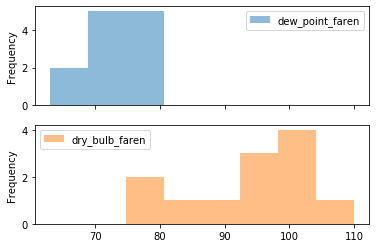

In [63]:
# Resample dew_point_faren and dry_bulb_faren by Month, aggregating the maximum values: monthly_max
monthly_max = df_clean[['dew_point_faren', 'dry_bulb_faren']].resample('M').max()

# Generate a histogram with bins=8, alpha=0.5, subplots=True
monthly_max.plot(kind='hist', bins=8, alpha=0.5, subplots=True)

# Show the plot
plt.show()

### Probability of high temperatures

Kita sudah tahu bahwa 2011 lebih panas daripada normals iklim selama tiga puluh tahun sebelumnya. Dalam latihan terakhir ini, Anda akan membandingkan suhu maksimum pada Agustus 2011 dengan suhu normal Agustus 2010. Lebih khusus lagi, Anda akan menggunakan plot CDF untuk menentukan probabilitas suhu maksimum harian 2011 di bulan Agustus berada di atas nilai normal iklim 2010. Untuk melakukan ini, Anda akan meningkatkan keterampilan manipulasi data, pemfilteran, resampling, dan visualisasi yang telah Anda peroleh selama kursus ini.

Dua DataFrames `df_clean` dan `df_climate` tersedia. Tugas Anda adalah memilih suhu maksimum pada bulan Agustus di `df_climate`, dan kemudian suhu harian maksimum pada Agustus 2011. Anda kemudian akan memfilter agar hanya hari-hari di Agustus 2011 yang di atas maksimum Agustus 2010, dan gunakan ini untuk membangun plot CDF .

Setelah Anda menghasilkan CDF, perhatikan bagaimana ini menunjukkan bahwa ada kemungkinan 50% dari suhu maksimum harian 2011 pada bulan Agustus menjadi 5 derajat di atas nilai normal iklim 2010!

95.3


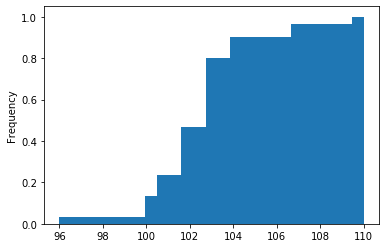

In [65]:
# Extract the maximum temperature in August 2010 from df_climate: august_max
august_max = df_climate.loc['2010-Aug', 'Temperature'].max()
print(august_max)

# Resample August 2011 temps in df_clean by day & aggregate the max value: august_2011
august_2011 = df_clean.loc['2011-Aug', 'dry_bulb_faren'].resample('D').max()

# Filter for days in august_2011 where the value exceeds august_max: august_2011_high
august_2011_high = august_2011[august_2011 > august_max]

# Construct a CDF of august_2011_high
august_2011_high.plot(kind='hist', density=True, cumulative=True, bins=25)

# Display the plot
plt.show()